## Vstavljanje v konstantnem času

Za zdaj pozabimo na iskanje. Naš naslednji cilj bo izumiti takšen algoritem vstavljanja, ki bo enako hiter ne glede na dolžino seznama. Da se ne bi kasneje kdo pritoževal, da smo ga nategnili, jasno definirajmo cilj: *hočemo postopek, ki bo vstavil element na neko že znano mesto in čas, ki ga bo potreboval za to, ne bo odvisen od dolžine seznama*. Da smo uspeli, bomo prepoznali po tem, da v vstavljanju ne bo zanke, ne v Pythonu ne kje spodaj, skrito v C-ju. Kako določiti mesto, kamor bomo vstavljali, pa nas zdaj ne zanima.

Slaba novica: s seznamom, kakor ga ponuja Python, tega ne moremo storiti. Če bi se dalo, bi metoda `insert` to že počela. Seznami, takšni kot so, tega ne dopuščajo. Izumiti bomo morali drugačne sezname.

S Pythonovimi seznami je narobe tole: videti so kot predalčki, v katerih so objekti. Če želimo narediti prostor v enem od predalčkov, bo potrebno premakniti vsebino vseh ostalih. Neizogibno. Potrebna bo povsem sveža ideja.

Spet si predstavljajmo reči fizično. Osebe naj bodo poljubno razmetane po prostoru, vsaka pa kaže na svojo naslednico po abecedi.

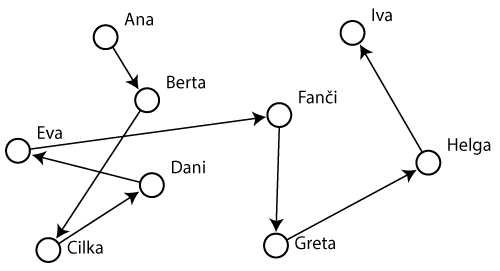

Tole lahko izvedemo v živo tako, da kličem imena po abecedi in osebe kažejo ena na drugo.

Zdaj pa to idejo sprogramirajmo. Za začetek le definirajmo razred `Oseba`, ki bo vseboval ime osebe, kazala pa bo, za začetek, nikamor.

In [1]:
class Oseba:
    def __init__(self, ime):
        self.ime = ime
        self.naslednji = None

Sestavimo tri osebe, ki naj pokažejo ena na drugo. Imeli bomo tudi spremenljivko `prva`, da bomo vedeli, kdo je prvi in `zadnja`, ki bo zadnja dodana. V začetku bo zadnja seveda kar prva.

In [2]:
ana = Oseba("Ana")
berta = Oseba("Berta")
cilka = Oseba("Cilka")
dani = Oseba("Dani")
ema = Oseba("Ema")
fanci = Oseba("Fanči")
greta = Oseba("Greta")
helga = Oseba("Helga")
iva = Oseba("Iva")

prvi = ana
ana.naslednji = berta
berta.naslednji = cilka
cilka.naslednji = dani
dani.naslednji = ema
ema.naslednji = fanci
fanci.naslednji = greta
greta.naslednji = helga
helga.naslednji = iva

Zdaj se spet lahko igramo v živo: nekdo mora izvedeti imena vseh oseb. Kako bo to storil? Šel bo k prvi, vsako bo vprašal po imenu, nato mu bo morala dotična povedati, kdo je naslednji. Zadnja pove, da naslednje ni. V tem duhu sprogramirajmo funkcijo, ki izpiše vse osebe.

In [3]:
def izpisi(prvi):
    kje_sem = prvi
    while kje_sem != None:
        print(kje_sem.ime)
        kje_sem = kje_sem.naslednji

In [4]:
izpisi(prvi)

Ana
Berta
Cilka
Dani
Ema
Fanči
Greta
Helga
Iva


Pomembna lekcija je, da moramo vedeti, kdo je prvi. Če jo izgubimo ... smo mrzli. Igra je sicer nekoliko zavajajoča: osebe stojijo v prostoru in v najslabšem primeru jih lahko sprašujemo, kako jim je ime. V Pythonu ni tako: če nimamo spremenljivke `prva`, ne moremo do nobene osebe. No, če imamo spremenljivko, recimo, `ema`, ki vsebuje Emo, lahko pridemo do vseh od Eme naprej, nazaj pa ne.

Zadnje pa nam ni potrebno poznati; zadnja je pač tista, ki ne kaže na nobeno naprej.

Zdaj pride Francka. Stoji ... kjerkoli pač stoji. Skladno z našim dogovorom, da vemo, kam v seznam sodi element, *vemo*, da se mora postaviti za Fanči. Koliko dela imamo s tem, da jo s tem, da jo vstavimo? Čisto malo: Fanči mora pokazati na Francko, Francka pa na tisto, na katero je prej kazala Fanči.

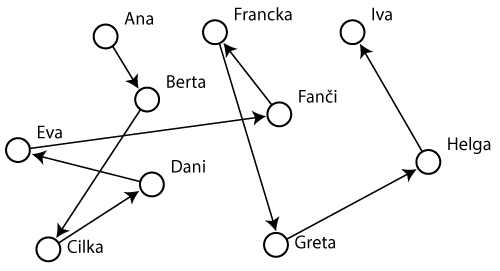

V živo to naredimo tako, da VEMO, kdo je Fanči. Kako vemo, za zdaj ni pomembno.)))
Kako se to sprogramira? Najprej bom nagoljufal, da bomo vedeli, kje je Fanči: že ob sestavljanju si jo bomo zapomnili.

In [5]:
def vstavi(ime, za_kom):
    novi = Oseba(ime)
    novi.naslednji = za_kom.naslednji
    za_kom.naslednji = novi

Tule moramo paziti na vrstni red vrstic: če bi ju zamenjali,

```python
    za_kom.naslednji = novi
    novi.naslednji = za_kom.naslednji
```

bi `novi.naslednji` kazal na `novi`, saj se je `za_kom.naslednji` prezgodaj spremenil.

Preverimo, da res deluje: vstavimo Francko za Fanči.

In [6]:
vstavi("Francka", fanci)

izpisi(prvi)

Ana
Berta
Cilka
Dani
Ema
Fanči
Francka
Greta
Helga
Iva


Paziti moramo Rekli smo `francka.naslednja = fanci.naslednja`, vrstico pred tem pa `fanci.naslednja = francka`. Prezgodaj smo povozili `fanci.naslednja`; na koncu to izpade tako, da recemo `francka.naslednja = francka`. Ker `francka` torej kaže nase, smo dobili neskončni cikel.

Tako, dobili smo vstavljanje v konstantnem času!

Naše navdušenje žal ne bo dolgotrajno.

### Kje je Fanči?

Najprej: Fanči sem nagoljufal. Rekel sem, da vemo, kje je. Zapomnil sem si jo ob sestavljanju seznama, ker sem vedel, da bom nekoč dodajal Francko. V splošnem tega, kam vstaviti, ne bomo vedeli.

Napišimo funkcijo `vstavi`, ki jih podamo le ime in *prvi* element seznama. Funkcija potem sama poišče mesto za vstavljanje. Začelo se bo takole:

In [7]:
def vstavi(prvi, ime):
    kje_sem = prvi
    while kje_sem != None and kje_sem.ime < ime:
        ...

Podobno je izpisu: korakamo po seznamu, dokler ne naletimo na ime, ki je po abecedi že za imenom, ki ga želimo vstaviti - ali pa pridemo do konca seznama in bo novo ime torej zadnje. Vrstni red pogojev je pomemben: najprej se vprašamo, ali je `kje_sem` še v seznamu, šele potem pogledamo njegovo ime. Če bi bilo obratno, bi lahko zahtevali `kje_sem.ime`, ko je `kje_sem` že `None`. `None.ime` pa ne obstaja.

Pa zdaj? Zdaj moramo vstaviti novi element **pred** `kje_sem`. Kdo pa je pred njim? Najboljše, da si zapomnimo, kdo je bil zadnji element pred `kje_sem`. Potem bomo vstavljali za prejšnjega, to pa že znamo.

In [8]:
def vstavi(prvi, ime):
    kje_sem = prvi
    pred = None
    while kje_sem != None and kje_sem.ime < ime:
        pred = kje_sem
        kje_sem = kje_sem.naslednji
        
    novi = Oseba(ime)
    pred.naslednji = novi
    novi.naslednji = kje_sem

Preverimo.

In [9]:
vstavi(prvi, "Hana")

izpisi(prvi)

Ana
Berta
Cilka
Dani
Ema
Fanči
Francka
Greta
Hana
Helga
Iva


Zna ta funkcija dodati tudi element na konec? Začuda: zna.

In [10]:
vstavi(prvi, "Jana")
izpisi(prvi)

Ana
Berta
Cilka
Dani
Ema
Fanči
Francka
Greta
Hana
Helga
Iva
Jana


Zanka steče do konca. `kje_sem` je `None`, `pred` pa je zadnji element. Vrstici

```python
    pred.naslednji = novi
    novi.naslednji = kje_sem
```

bosta prejšnjemu povedala, da mu sledi `novi`, novemu pa, da mu ne sledi nihče.

Kaj pa prvega, zna dodati prvega? Ali pa - zna dodajati v prazen seznam, ko je `prvi` enak `None`.

Dve težavi. Prva je, da se zanka `while` v tem primeru ne izvede nikoli in je `pred` enak `None`, torej `pred.naslednji` ne obstaja. Reševanje tega problema je povezano z drugim problemom: funkcija mora spremeniti `prvi`. Tega pa ne more. `prvi` je neka spremenljivka ... od zunaj.

Edina smiselna rešitev je, da funkcija `vstavi` vedno vrne prvi element. V večini primerov vrne kar obstoječi prvi element, včasih pa bo vrnila novega.

In [11]:
def vstavi(prvi, ime):
    kje_sem = prvi
    pred = None
    while kje_sem != None and kje_sem.ime < ime:
        pred = kje_sem
        kje_sem = kje_sem.naslednji
        
    novi = Oseba(ime)
    if pred != None:
        pred.naslednji = novi
    else:
        prvi = novi
    novi.naslednji = kje_sem
    return prvi

In [12]:
prvi = vstavi(prvi, "Alenka")

izpisi(prvi)

Alenka
Ana
Berta
Cilka
Dani
Ema
Fanči
Francka
Greta
Hana
Helga
Iva
Jana


Kaj pa sestavljanje čisto novega seznama? Od začetka? Poskusimo.

In [13]:
osebe = ["Ana", "Berta", "Cilka", "Dani", "Ema", "Fanči", "Greta", "Helga", "Iva", "Jana"]

import random
random.shuffle(osebe)
osebe

['Dani',
 'Iva',
 'Greta',
 'Cilka',
 'Jana',
 'Ema',
 'Helga',
 'Ana',
 'Berta',
 'Fanči']

In [14]:
prvi = None

for oseba in osebe:
    prvi = vstavi(prvi, oseba)
    
izpisi(prvi)

Ana
Berta
Cilka
Dani
Ema
Fanči
Greta
Helga
Iva
Jana


## Brisanje

Dodajmo še brisanje. Funkcija bo predpostavila, da element, ki ga hočemo pobrisati obstaja. Če ga ni, se bo pač zgodila kakšna napaka. Tudi če pokličemo `list`-ov `remove` z elementom, ki ga ni, javi napako (le da, jasno pove, kaj ga moti, naša funkcija pa ne bo).

In [15]:
def pobrisi(prvi, ime):
    kje_sem = prvi
    pred = None
    while kje_sem.ime != ime:
        pred = kje_sem
        kje_sem = kje_sem.naslednji
        
    pred.naslednji = kje_sem.naslednji
    return prvi

Kaj - to je vse? No, skoraj.

Zanka je takšna kot prej; tako kot prej moramo poznati element pred tem, ki ga brišemo.

Brišemo potem preprosto tako, da element, ki je pred `kje_sem`, pokaže na tistega, ki je za `kje_sem`. Kaj pa naredimo s `kje_sem` in njegovim kazanjem? Nič. Drugi ne bodo več kazali nanj in to je to.

Da vidimo. Pobrišimo najprej enega iz sredine.

In [16]:
prvi = pobrisi(prvi, "Dani")

izpisi(prvi)

Ana
Berta
Cilka
Ema
Fanči
Greta
Helga
Iva
Jana


Odlično. Pa zadnjega?

In [17]:
prvi = pobrisi(prvi, "Jana")

izpisi(prvi)

Ana
Berta
Cilka
Ema
Fanči
Greta
Helga
Iva


Da brisanje zadnjega deluje, ni presenetljivo: `kje_sem` je zadnji; tisti pred njim bo pokazal na tistega za njim, torej na `None`.

Kaj pa brisanje prvega? To seveda ne bo šlo: tam se `prvi` spremeni, funkcija pa vedno vrača isti `prvi`. Poleg tega je `pred` takrat `None`.

To bo v resnici enostavno popraviti: če brišemo prvega, ne spremenimo ničesar, temveč le vrnemo novega prvega.

In [18]:
def pobrisi(prvi, ime):
    kje_sem = prvi
    pred = None
    while kje_sem.ime != ime:
        pred = kje_sem
        kje_sem = kje_sem.naslednji
        
    if pred != None:
        pred.naslednji = kje_sem.naslednji
    else:
        prvi = kje_sem.naslednji
    return prvi

In [19]:
prvi = pobrisi(prvi, "Ana")

izpisi(prvi)

Berta
Cilka
Ema
Fanči
Greta
Helga
Iva


## Vse skupaj

Sprogramirali smo tole.

In [20]:
class Oseba:
    def __init__(self, ime):
        self.ime = ime
        self.naslednji = None
        
        
def izpisi(prvi):
    kje_sem = prvi
    while kje_sem != None:
        print(kje_sem.ime)
        kje_sem = kje_sem.naslednji
    
    
def vstavi(prvi, ime):
    kje_sem = prvi
    pred = None
    while kje_sem != None and kje_sem.ime < ime:
        pred = kje_sem
        kje_sem = kje_sem.naslednji
        
    novi = Oseba(ime)
    if pred != None:
        pred.naslednji = novi
    else:
        prvi = novi
    novi.naslednji = kje_sem
    return prvi      
        
    
def pobrisi(prvi, ime):
    kje_sem = prvi
    pred = None
    while kje_sem.ime != ime:
        pred = kje_sem
        kje_sem = kje_sem.naslednji
        
    if pred != None:
        pred.naslednji = kje_sem.naslednji
    else:
        prvi = kje_sem.naslednji
    return prvi

Kako leto na predavanjih - na vajah pa kar vedno - sprogramiramo tudi takšen seznam, v katerem vsaka oseba ve, kdo je pred in kdo za njo. To je predvsem dobra vaja iz kazanja sem in tja. V praksi pa od tega ni kakšnih izjemnih koristi.


## Bisekcija ... in katastrofa

Spomnimo se, kako smo prišli sem. Hoteli smo se iti bisekcijo. Za bisekcijo morajo biti elementi urejeni. Torej urejene tabele.

Potem smo hoteli dodajati elemente. In ugotovili smo, da je vrivanje v urejen seznam drago, ker zahteva prestavljanje elementov. Hoteli smo odkriti podatkovno strukturo, ki omogoča hitro vrivanje. In tako smo odkrili tole.

Zdaj lahko torej naredimo bisekcijo, ne?

Bisekcija najprej preveri srednji element. Kako pa naj pride do njega? Vedeti je potrebno, koliko elementov imamo (to si lahko navsezadnje zapomnimo) in potem vzamemo srednjega.

Te funkcija pa še nismo napisali. Pa dajmo.

In [21]:
def element(prvi, n):
    kje_sem = prvi
    for i in range(n):
        kje_sem = kje_sem.naslednji
    return kje_sem

Vidimo katastrofo? Funkcija je preprosta, vendar - glejte, kaj počne! Da pride do n-tega elementa potrebuje n korakov. Z dežja pod kap smo prišli. Vstavljanje je zdaj res zastonj, a karkoli drugega bomo počeli s tem seznam, nas bo drago stalo.

Rekurzija bo najprej potrebovala $n/2$ korakov, da se dokoplje do srednjega elementa. Potem $n/4$, da dobi srednjega v levi ali desni polovici. In potem $n/4$, ko bo hotela razpoloviti še to. In tako naprej. Skupaj bo to $n/2 + n/4 + n/8 + ... = n(1/2 + 1/4 + 1/8 + ...) = n$ korakov.

Tako počasna bo kot linearno iskanje.

Vse je bilo zaman.


## Urejanje misli (in terminologije)


**Temu, čemur Python reče seznam** (*list*), se v teoriji pravi *tabela*, v angleščini pa *array*.

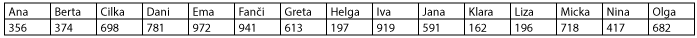

Tabelo odlikuje *naključni dostop* (*random access*) ali, bolj pravilno *neposredni dostop* (*direct access*). Naključen je prav za razliko od tega, ki so ga spoznali pravkar; medtem ko je pri tem možen le *zaporedni dostop* (*sequential access*), si lahko pri tabeli izmišljujem, da bi zdaj peti element, nato prvega in potem tisočega. Ter ga dobim, takoj. To je imenitno, cena pa je, da težko vstavljam elemente. Tudi, kadar ni urejena: vstavljanje na $i$-to mesto zahteva, da vse od $i$-tega naprej prestavim. In to jemlje čas.

Tabele so računalniku blizu. Že dolgo veste - kot ve vsak, ki kdaj kupuje računalnik - da se pomnilnik imenuje RAM. Nemara veste tudi, da to pomeni "random-access memory". Z vidika programerja (predvsem programerja v Cju in še bolj programerja v zbirniku, nikakor pa ne z vidika programerja v Pyhtonu) je ves računalnikov pomnilnik ena sama ogromna tabela bajtov. Tabela z indeksi od 0 do toliko kolikor bajtov ima pomnilnik, in vsak element te table lahko vsebuje številko med 0 in 255. (Nekoliko poenostavljam. Tako je bilo pred 30 leti, današnji računalniki pa imajo navidezni pomnilnik z navideznimi naslovi. Pomnilnik kot veliko tabelo vidi le še procesor. Ampak v Cju še vedno izgleda *skoraj* tako, kot da bi bil pomnilnik tabela.)

Ker je torej tabela blizu računalniku, so tabele navadno hitre. V nižjenivojskih jezikih (C in podobni) delamo z njimi tako, da zahtevamo toliko in toliko pomnilnika ter vanj zapišemo, kar pač hočemo. Kako dolga je tabela (`len`) vemo, saj smo jo sami rezervirali. Dostop do elementov (indeksiranje) je bliskovito. Brisanje (`clear`) v nekem smislu ne obstaja (pustimo ta detajl). Med metodami Pyhtonovih seznamov, ki jih še dovolim uporabljati, je še ena, namreč `append`. Ta je v resnici kar draga: če hočem svojo tabelo povečati, moram zahtevati več pomnilnika. S pomnilnikom v resnici upravljajo Windowsi (Os X, Linux) in ti mi ne morejo preprosto povečati mojega kosa pomnilnika, saj je lahko "nadaljevanje" mojega kosa že zasedeno. Lahko se zgodi, da bo moral preseliti moj kos drugam, kam, kjer je še več prostora. To potegne za seboj kup zoprnij. Python za to kar učinkovito poskrbi zato se delajmo, da je `append` hiter.

**Temu, kar smo delali zgoraj**, se v teoriji reče *seznam* (*list*). Ja, tako kot Python pravi tabeli. Konkretno, to, kar smo naredili je enojno povezan seznam, zato ker vsak kaže na naslednjega, ne pa tudi na prejšnjega. Če bi kazali še na prejšnjega, bi dobili dvojno povezan seznam. Njegova prednost je očitna; manjša slabost je, da moramo takrat, ko vstavljamo element, prevezati še "kazalce" nazaj. Sezname navadno narišemo tako.

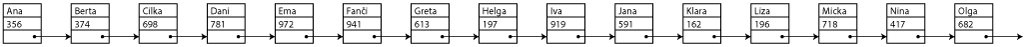

Seznami niso tako neuporabni, kot so se nam morda zazdeli. Na način, kot smo jih poskušali uporabljati tule, jih res ne uporabljamo, vsaj ne navadno. V resnici so praktični predvsem zato, ker je vanje lahko dodati element na koncu ali na začetku. Uporabljamo jih torej predvsem takrat, ko bi hoteli v nek "seznam" le metati reči v poljubnem vrstnem redu in se občasno zapeljati čeznje, v poljubnem vrstnem redu. Če hočemo, recimo, sešteti vse vrednosti v seznamu, je ta prav toliko dober kot tabela. Seznam bi bil v resnici koristen predvsem, če `append` ne bi bil zastonj.

Osebno ... včasih so bili seznami koristnejši kot danes. Pomnilniki so bili manjši, morali smo biti skromnejši... V resnici pa jih že zelo dolgo nisem uporabljal, sploh, odkar programiram predvsem v Pythonu. Če torej sodim po sebi, so bili ti seznami koristna vaja iz razmišljanja ... in izhodišče za naslednji korak.